In [193]:
%pip install tabulate
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import RobustScaler
from colorama import Fore
from sklearn import metrics
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA 
import math
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Lý thuyết mô hình Linear Regression

Mô hình Linear Regression là một phương pháp học máy cơ bản được sử dụng để dự đoán mối quan hệ tuyến tính giữa các biến. Mô hình giả định rằng có một mối quan hệ tuyến tính giữa các biến đầu vào (đặc trưng) và biến đầu ra (mục tiêu).

**Công thức tổng quát:**

   y = b + w1*x1 + w2*x2 + ... + wn*xn

   Trong đó:
    * y là biến mục tiêu (biến cần dự đoán).
    * x1, x2, ..., xn là các biến đầu vào (đặc trưng).
    * w1, w2, ..., wn là các trọng số (coefficients) của các biến đầu vào.
    * b là hệ số chặn (intercept).

**Siêu tham số:**

   * Linear Regression cơ bản không có siêu tham số cần điều chỉnh. Tuy nhiên, các biến thể của nó như Ridge và Lasso Regression có thêm siêu tham số alpha để điều chỉnh độ mạnh của regularization.

**Hàm mục tiêu (Loss Function):**

   Hàm mục tiêu thường được sử dụng để huấn luyện mô hình Linear Regression là **Mean Squared Error (MSE)**.

   MSE được tính bằng trung bình của bình phương sai số giữa các giá trị dự đoán và giá trị thực tế:

   MSE = (1/n) * Σ(yi - ŷi)^2

   Trong đó:
    * n là số lượng mẫu dữ liệu.
    * yi là giá trị thực tế của mẫu thứ i.
    * ŷi là giá trị dự đoán của mẫu thứ i.

   Mục tiêu của quá trình huấn luyện là tìm các giá trị của w và b sao cho MSE là nhỏ nhất.

In [194]:
# Load the dataset train, val, test from ../clean_data
trainset = pd.read_csv('../clean_data/train_cleaned.csv')
valset = pd.read_csv('../clean_data/val_cleaned.csv')
testset = pd.read_csv('../clean_data/test_cleaned.csv')

print(f"Kích thước dữ liệu huấn luyện: {trainset.shape}")
print(f"Kích thước dữ liệu kiểm định: {valset.shape}")
print(f"Kích thước dữ liệu kiểm tra: {testset.shape}")

trainset.head(5)

Kích thước dữ liệu huấn luyện: (8946, 55)
Kích thước dữ liệu kiểm định: (1917, 55)
Kích thước dữ liệu kiểm tra: (1918, 55)


,Duration,Date,Total_Stops,SClass,Price,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Airline_Bamboo Airways,...,Destination_TBB,Destination_THD,Destination_UIH,Destination_VCA,Destination_VCL,Destination_VCS,Destination_VDH,Destination_VDO,Destination_VII,Destination_VKG
0,-0.171875,18,0,0,2654000,19,50,21,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.796875,18,1,0,8983000,9,15,15,40,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.140625,17,1,1,1735000,9,50,18,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.156250,17,0,0,1859000,9,50,11,10,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.171875,15,0,1,2536000,12,5,13,20,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
def models_score(x_train, x_val, y_train, y_val):    
    models = {
        "Linear": LinearRegression(),
         }
    evalutes = {}
    i = 0
    maes = []
    rmse = []
    mape = []
    names = []
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred=model.predict(x_val) 
        names.append(name)
        maes.append(mean_absolute_error(y_val,y_pred))
        rmse.append(math.sqrt(mean_squared_error(y_val,y_pred)))
        mape.append(mean_absolute_percentage_error(y_val, y_pred))
    evalutes = {'Algorithms': names, 'MAE': maes, 'RMSE': rmse, "MAPE":mape}
    model_scores = pd.DataFrame(evalutes)
    return model_scores

In [ ]:
X_train = trainset.drop(columns=['Price'])
y_train = trainset['Price']

X_val = valset.drop(columns=['Price'])
y_val = valset['Price']

# X_test = testset.drop(columns=['Price'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

In [197]:
score = models_score(X_train, X_val, y_train, y_val)
score

,Algorithms,MAE,RMSE,MAPE
0,Linear,1.370790e+06,1.738483e+06,0.55261


In [198]:

def predict(ml_model, x_train, x_val):
    print('Model: {}'.format(ml_model))
    table = []
    headers = ['Metrics', 'Values']
    
    model = ml_model.fit(x_train, y_train)
    
    training_score = ml_model.score(x_train, y_train)
    valing_score = ml_model.score(x_val, y_val)
    table.append(['Training score', training_score])
    table.append(['valing score', valing_score])
    
    predictions = ml_model.predict(x_val)
    
    MAE = mean_absolute_error(y_val, predictions)
    MSE = mean_squared_error(y_val, predictions)
    RMSE = np.sqrt(MSE)
    
    table.append(['MAE', MAE]) 
    table.append(['MSE', MSE]) 
    table.append(['RMSE', RMSE])
    
    print(tabulate(table, headers=headers, tablefmt='fancy_grid', numalign='right', floatfmt=".2f"))
    
    return predictions, training_score, valing_score, MAE, MSE, RMSE

In [ ]:
lr = LinearRegression()

In [200]:
def plot(predictions, y_true):
    sns.distplot(y_true - predictions, kde=True, hist=False, color='red')
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error (True Price - Predicted Price)")
    plt.ylabel("Density")
    plt.show()
    
    fig1, ax = plt.subplots(1, 1, figsize=(20, 5))

    ax.plot([i for i in range(250)], y_true[:250], color='blue', label='True Price')
    ax.plot([i for i in range(250)], predictions[:250], color='orange', label='Predicted Price')

    ax.set_ylabel("Price (VND)")
    ax.set_xlabel("Sample Index")
    ax.legend()
    plt.title("True vs Predicted Prices (Line Plot)")
    plt.show()
    
    fig2, ax = plt.subplots(1, 1, figsize=(20, 5))

    ax.scatter([i for i in range(250)], y_true[:250], color='blue', label='True Price', s=50)
    ax.scatter([i for i in range(250)], predictions[:250], color='orange', label='Predicted Price', s=50)
    
    ax.set_ylabel("Price (VND)")
    ax.set_xlabel("Sample Index")
    ax.legend()
    plt.title("True vs Predicted Prices (Scatter Plot)")
    plt.show()

Model: LinearRegression()
╒════════════════╤══════════════════╕
│ Metrics        │           Values │
╞════════════════╪══════════════════╡
│ Training score │             0.33 │
├────────────────┼──────────────────┤
│ valing score   │             0.35 │
├────────────────┼──────────────────┤
│ MAE            │       1370790.48 │
├────────────────┼──────────────────┤
│ MSE            │ 3022324667603.05 │
├────────────────┼──────────────────┤
│ RMSE           │       1738483.44 │
╘════════════════╧══════════════════╛


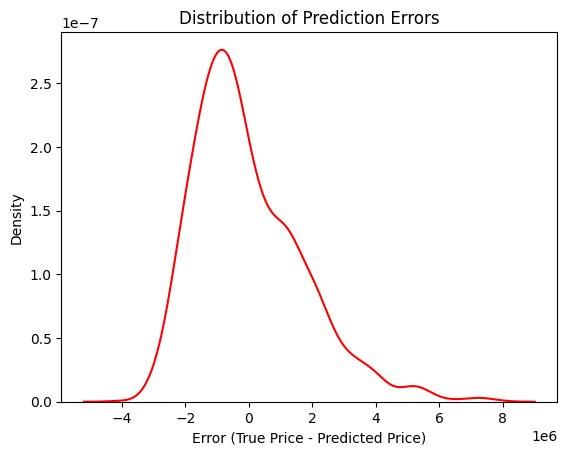

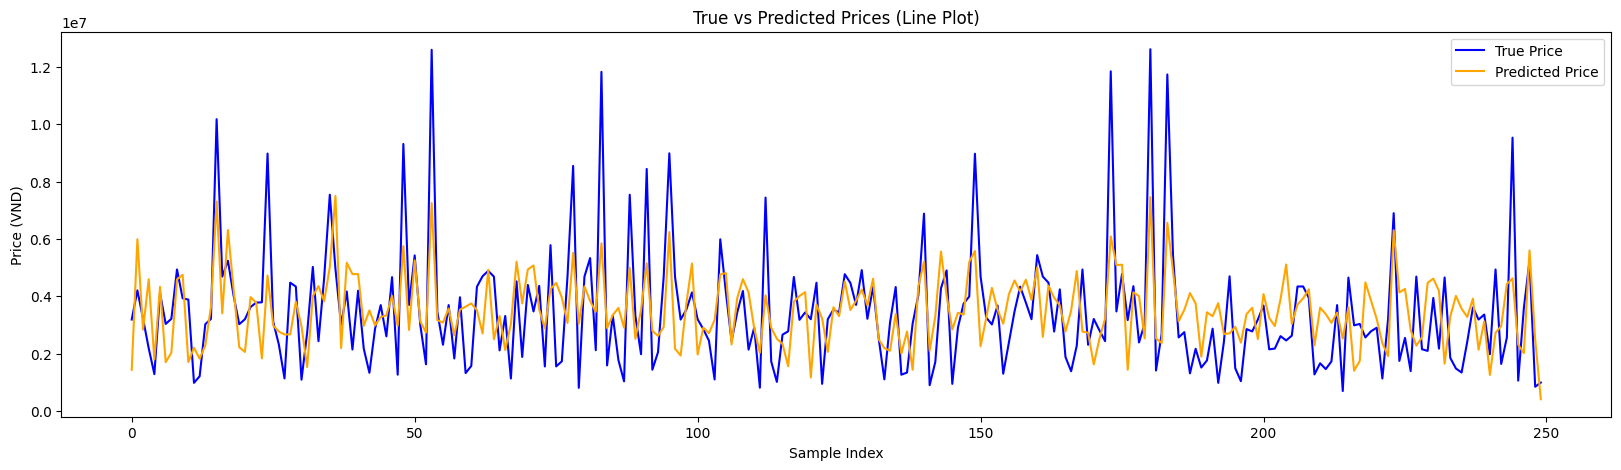

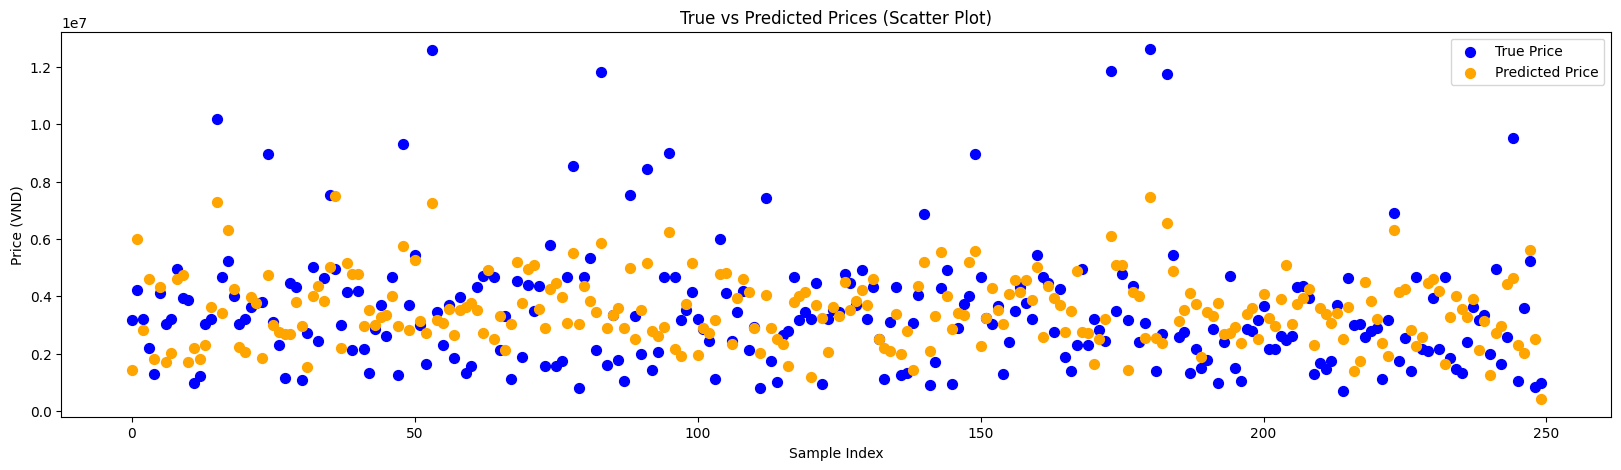

In [201]:
predictions_lr, training_score_lr, valing_score_lr, MAE_lr, MSE_lr, RMSE_lr = predict(lr, X_train, X_val)
plot(predictions_lr, y_val)

MAE: 1370790.4768135648
RMSE: 1738483.438978655
MAPE: 0.5526096143084245
R2: 0.35110081710635066


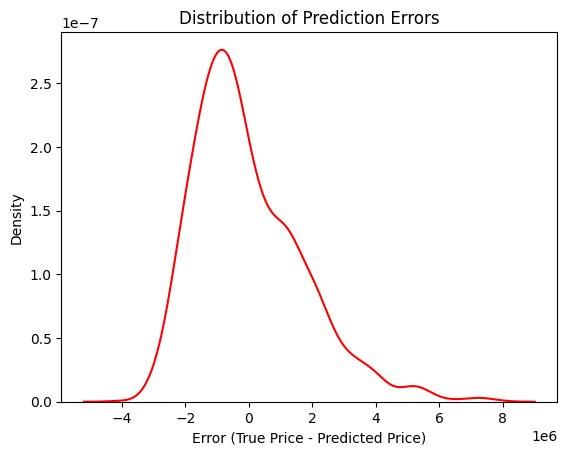

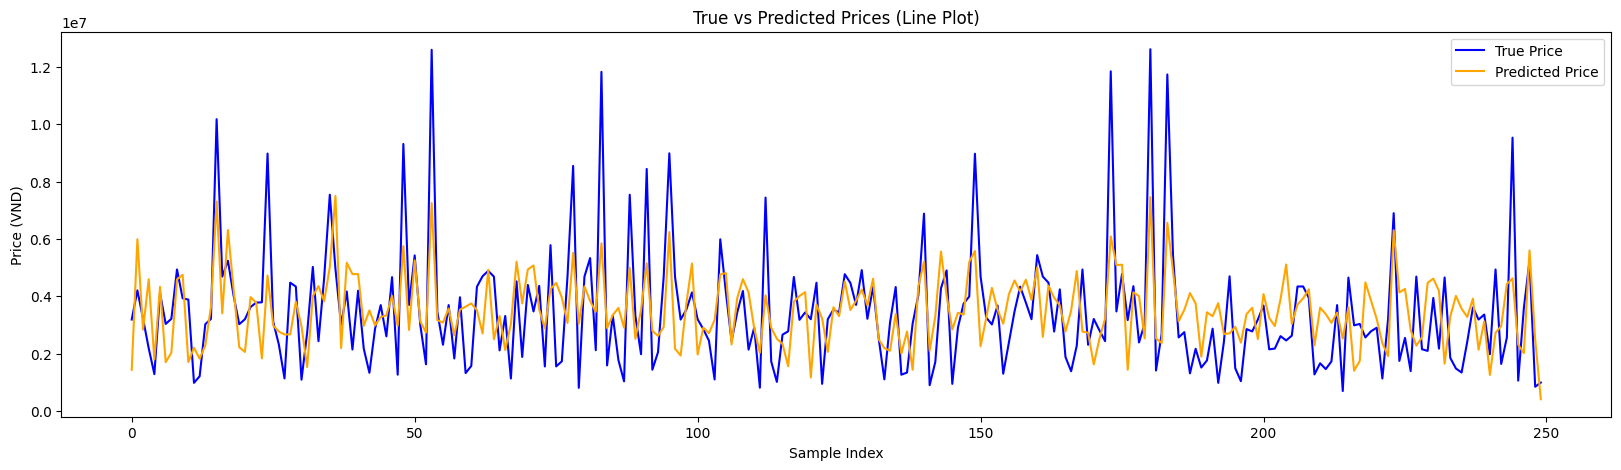

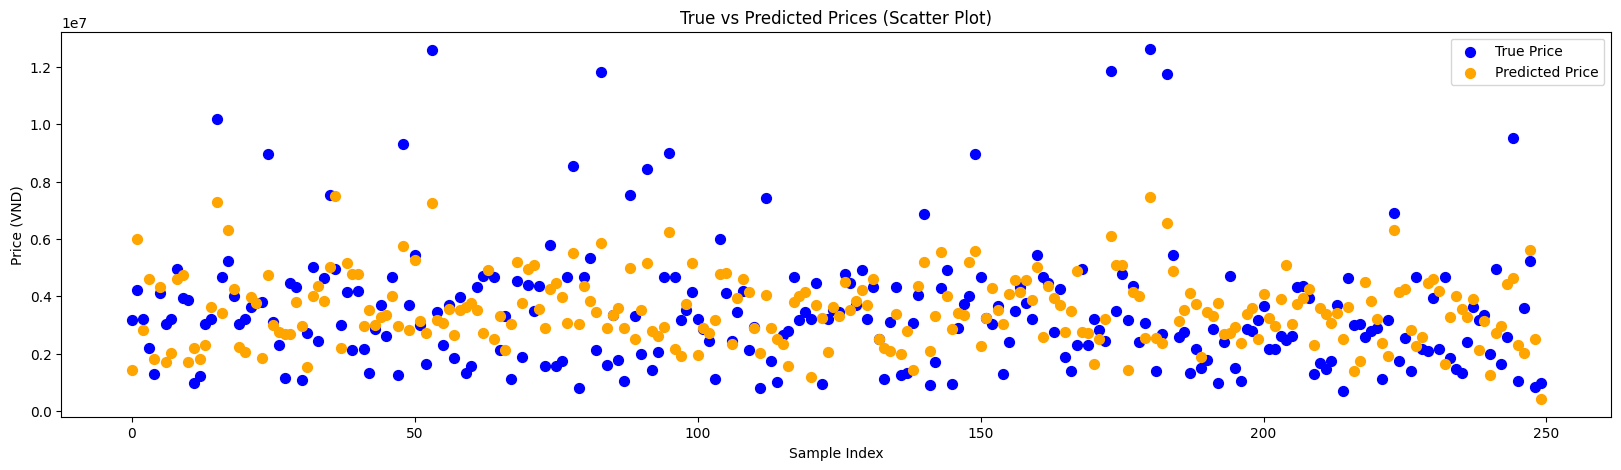

In [207]:
if isinstance(y_train, (pd.Series, pd.DataFrame)):
    y_train = y_train.values.reshape(-1, 1)
    y_val = y_val.values.reshape(-1, 1)
elif y_train.ndim == 1:
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

linear_y_pred = linear_reg.predict(X_val_scaled)

# Đánh giá mô hình
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Calculate evaluation metrics
linear_score_mae = mean_absolute_error(y_val, linear_y_pred)
linear_score_rmse = np.sqrt(mean_squared_error(y_val, linear_y_pred))
linear_score_mape = mean_absolute_percentage_error(y_val, linear_y_pred)
linear_score_r2 = r2_score(y_val, linear_y_pred)

# Print results
print("MAE:", linear_score_mae)
print("RMSE:", linear_score_rmse)
print("MAPE:", linear_score_mape)
print("R2:", linear_score_r2)

# Vẽ biểu đồ
plot(linear_y_pred.flatten(), y_val.flatten())

Best Linear Regression Parameters: {'fit_intercept': True}
Validation MAE: 1370790.4768135648
Validation RMSE: 1738483.438978655
Validation MAPE: 0.5526096143084245
Validation R2: 0.35110081710635066


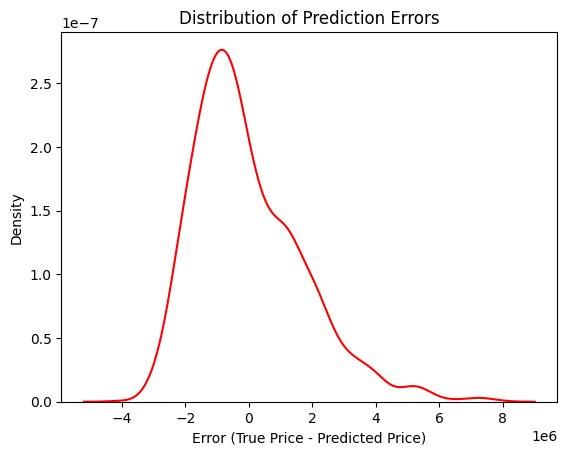

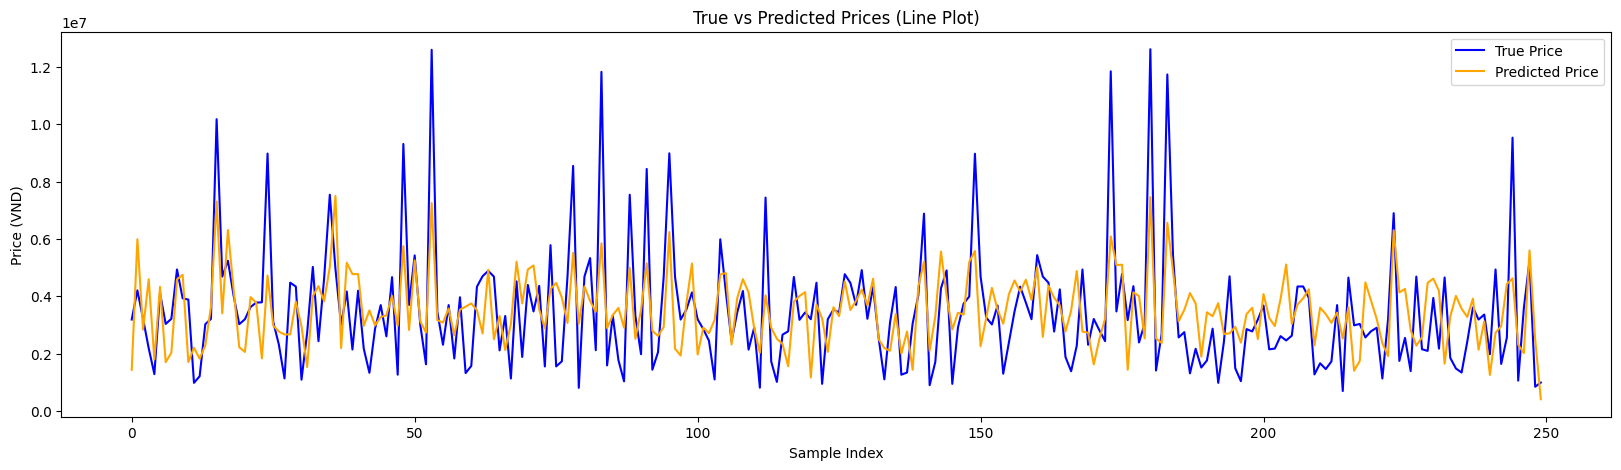

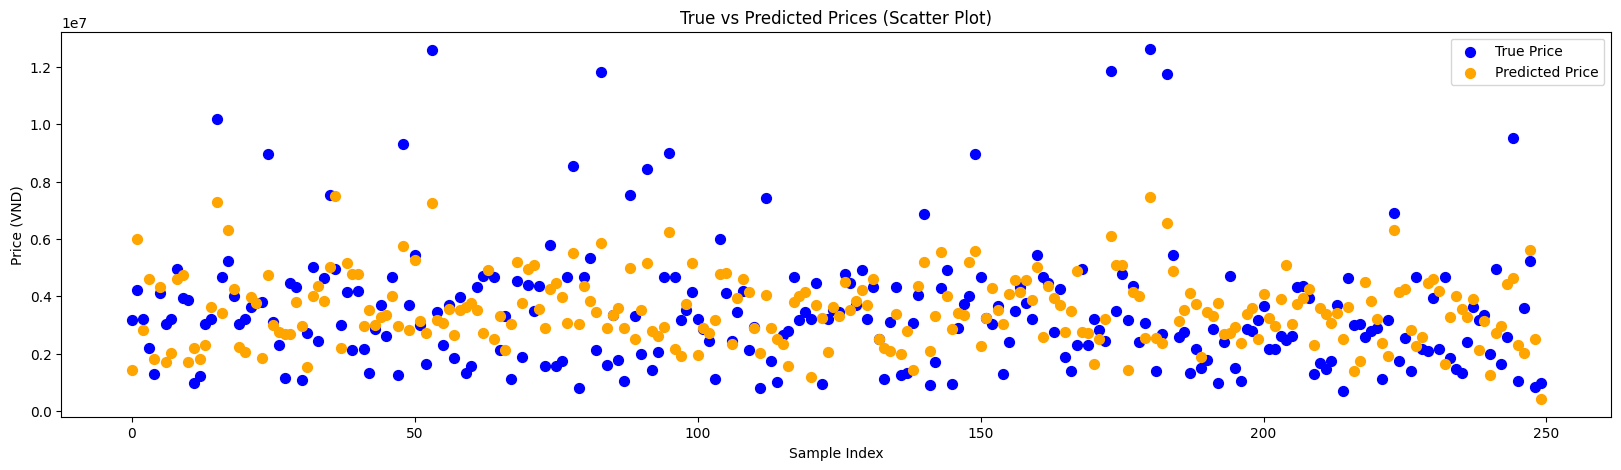

In [208]:
# Define the parameter grid for Linear Regression
param_grid = {'fit_intercept': [True, False]}

# Initialize Linear Regression model
linear_model = LinearRegression()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_linear_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the validation set
y_val_pred = best_linear_model.predict(X_val_scaled)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
mape = mean_absolute_percentage_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the results
print("Best Linear Regression Parameters:", best_params)
print("Validation MAE:", mae)
print("Validation RMSE:", rmse)
print("Validation MAPE:", mape)
print("Validation R2:", r2)

plot(y_val_pred.flatten(), y_val.flatten())

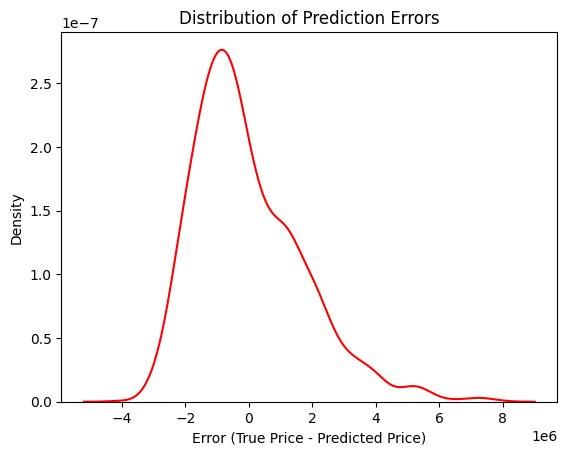

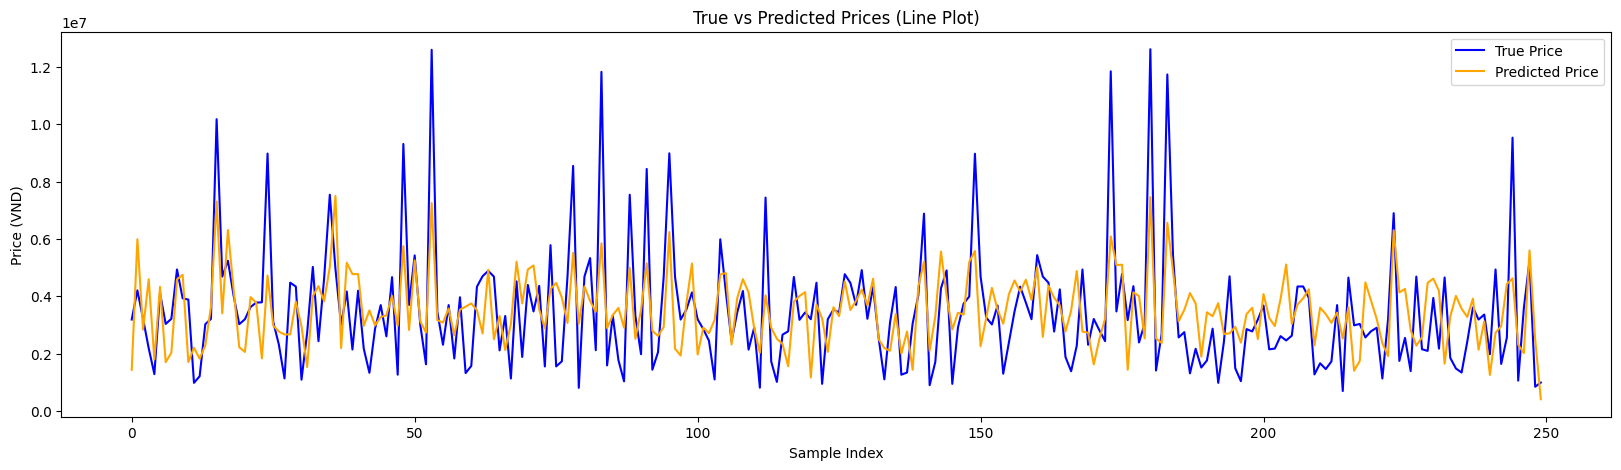

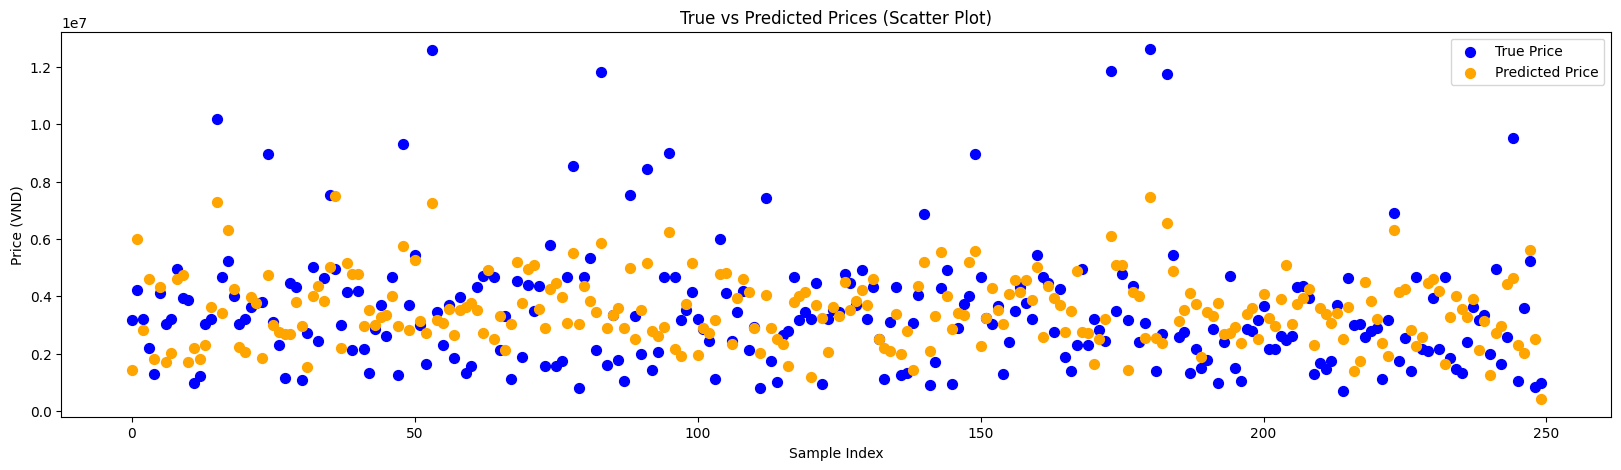

In [209]:
plot(y_val_pred.flatten(), y_val.flatten())

In [210]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Define a function to evaluate models with regularization
def evaluate_regularization_models(X_train, X_val, y_train, y_val):
    models = {
        "Lasso": Lasso(alpha=0.01),
        "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5)
    }
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mape = mean_absolute_percentage_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        results.append({"Model": name, "MAE": mae, "RMSE": rmse, "MAPE": mape, "R2": r2})

    return pd.DataFrame(results)

# Evaluate the models
regularization_results = evaluate_regularization_models(X_train_scaled, X_val_scaled, y_train, y_val)

# Display the results
print(regularization_results)


        Model           MAE          RMSE      MAPE        R2
0       Lasso  1.370790e+06  1.738483e+06  0.552610  0.351101
1  ElasticNet  1.370764e+06  1.739356e+06  0.552981  0.350449


Model: LinearRegression()


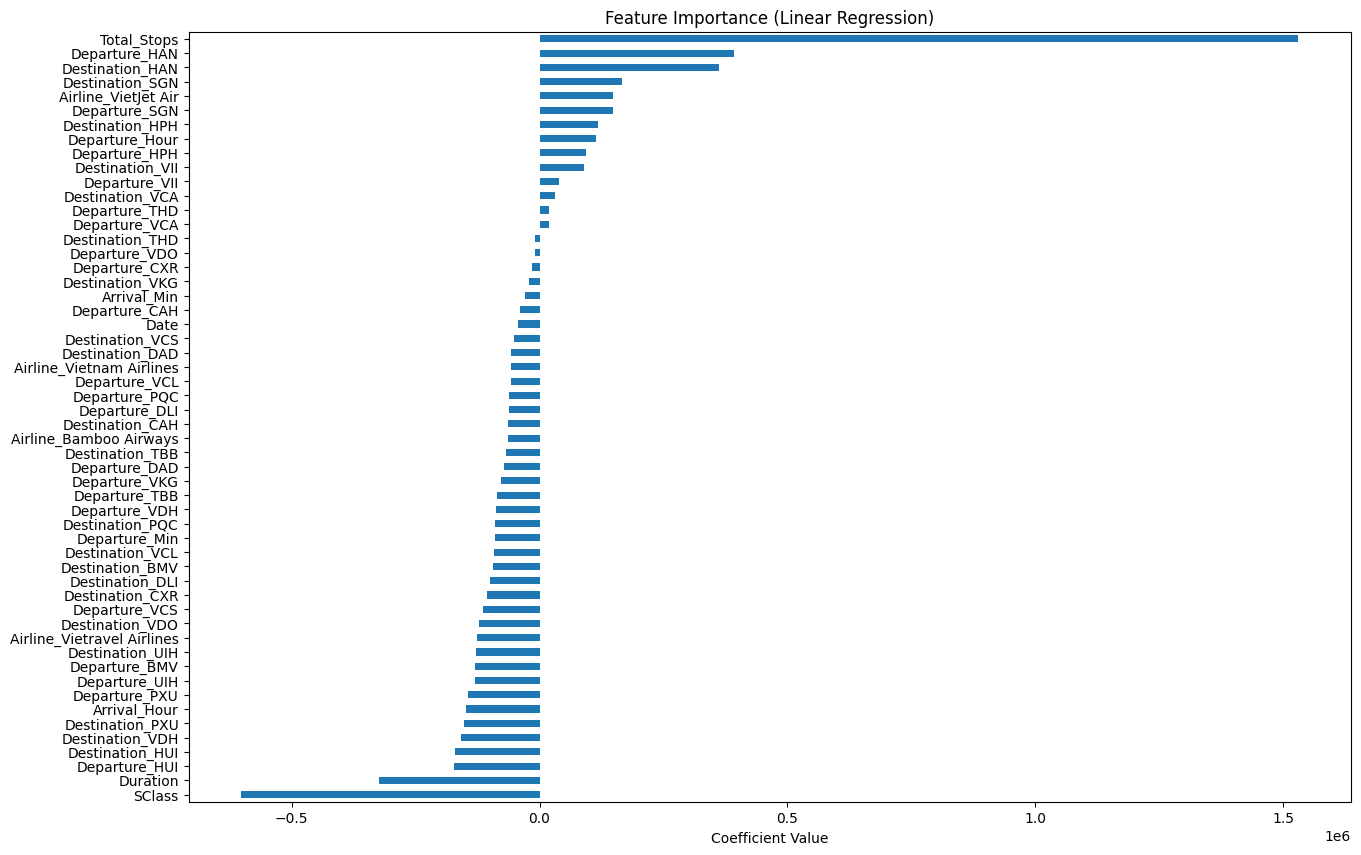

In [211]:
def feature_importance_linear(ml_model, feature_names):
    print('Model: {}'.format(ml_model))
    model = ml_model.fit(X_train_scaled, y_train)
    plt.figure(figsize=(15, 10))
    feat_importances = pd.Series(model.coef_.flatten(), index=feature_names).sort_values(ascending=True)
    feat_importances.plot(kind='barh')
    plt.xlabel("Coefficient Value")
    plt.title("Feature Importance (Linear Regression)")
    plt.show()

# Call the updated function with LinearRegression
ln_model = LinearRegression()
feature_importance_linear(ln_model, X_train.columns)

Iteration 0: Cost = 8020261776061.727, w = [3431.74704896 2893.61778448 1714.78000206 1907.49505924]
Iteration 100: Cost = 5921143452187.754, w = [310542.95573354 253210.08372242 153447.00804056 172455.1598059 ]
Iteration 200: Cost = 4639417090392.577, w = [557085.14919637 438216.97825906 271893.29477649 308959.92500425]
Iteration 300: Cost = 3851709576109.8716, w = [756489.16892103 572777.19001717 364268.34230607 418815.19637719]
Iteration 400: Cost = 3362835500871.5796, w = [919187.00550044 668422.79552293 436191.9880482  507776.75745015]
Iteration 500: Cost = 3054962575669.504, w = [1053281.36200449  734099.32207995  492044.21380544  580327.53181581]
Iteration 600: Cost = 2856938268681.3237, w = [1165065.74328211  776743.82711976  535240.97078188  639960.97076063]
Iteration 700: Cost = 2725781395471.6304, w = [1259428.43830444  801733.8932294   568448.49253066  689401.2280655 ]
Iteration 800: Cost = 2635513870876.271, w = [1340166.31422116  813236.35639255  593749.82321216  730774.2

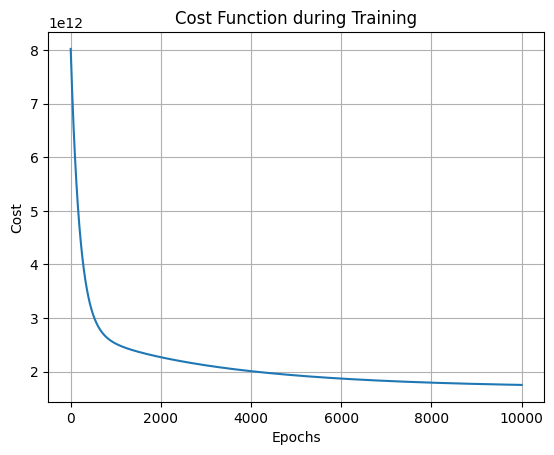

MAE: 1489016.4009639462
RMSE: 1933645.5302414333
MAPE: 0.5707116900426
R2: 0.19723239494311906


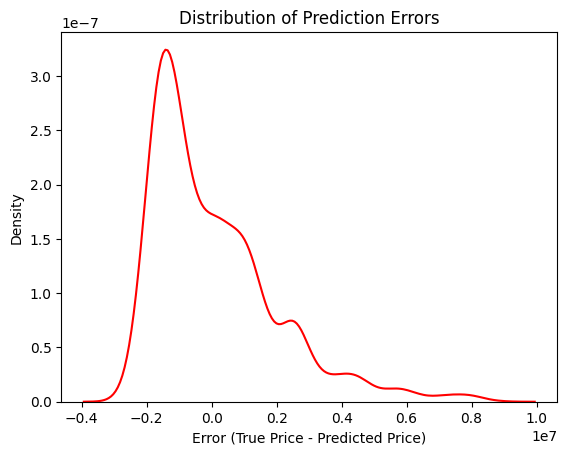

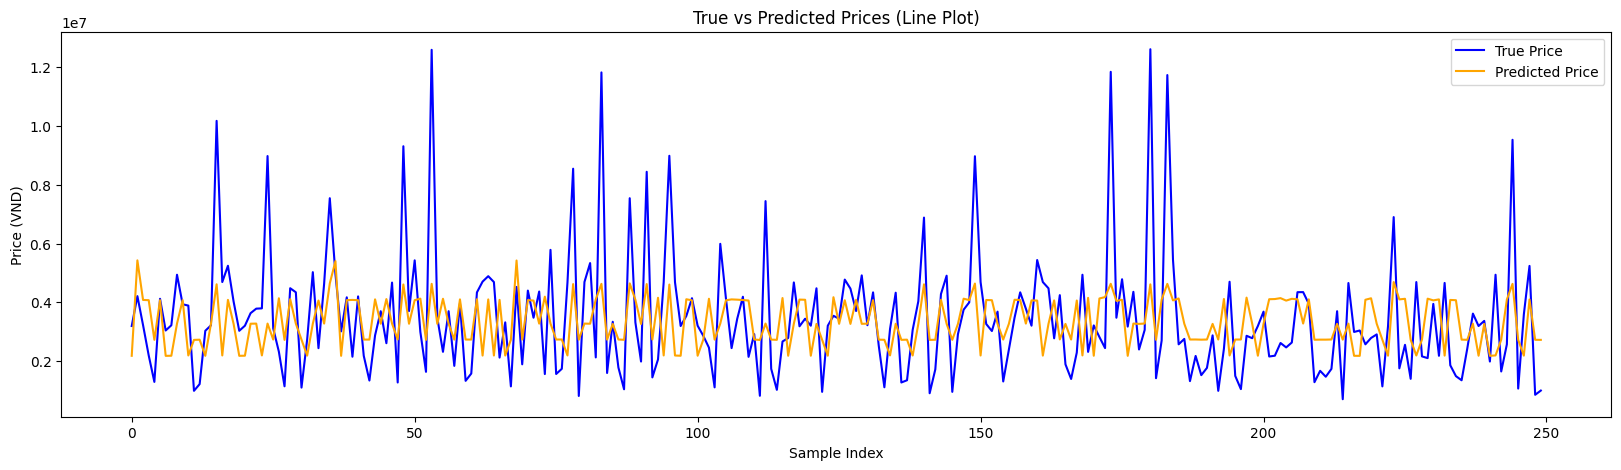

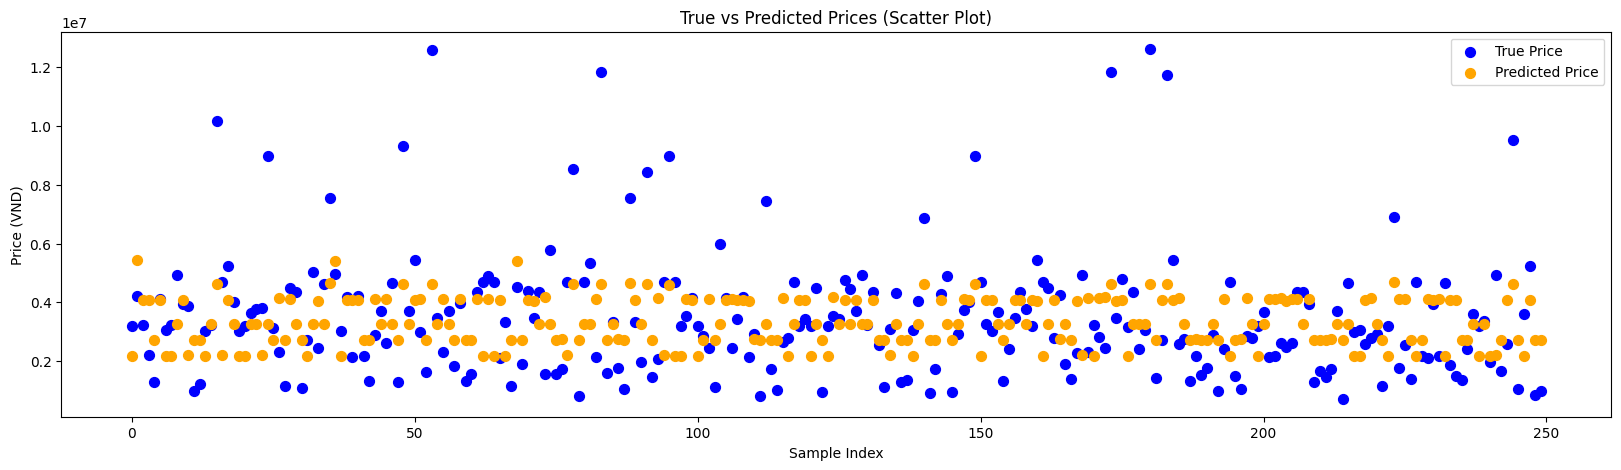

In [213]:
# Select the desired columns from the original DataFrame before scaling
selected_features = ['SClass', 'Duration', 'Total_Stops']
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
linear_reg_s = ModelLinearRegression()
linear_reg_s.train(X_train_selected, y_train)
linear_y_pred_s = linear_reg_s.predict(X_val_selected)

# Đánh giá mô hình
linear_score_mae, linear_score_rmse, linear_score_mape, linear_r2 = linear_reg_s.evaluate(y_val, linear_y_pred_s)

# In kết quả
print("MAE:", linear_score_mae)
print("RMSE:", linear_score_rmse)
print("MAPE:", linear_score_mape)
print("R2:", linear_r2)

# Vẽ biểu đồ
plot(linear_y_pred_s.flatten(), y_val.flatten())

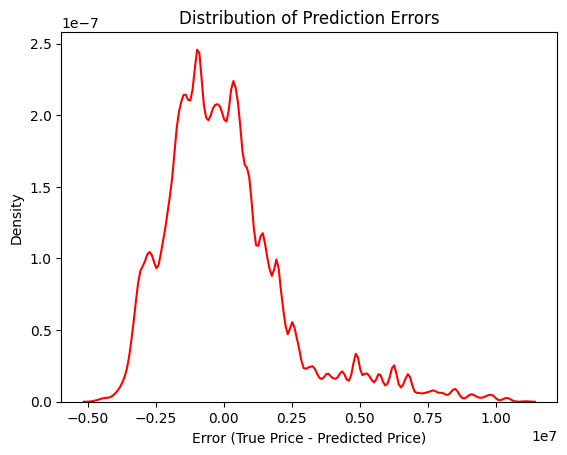

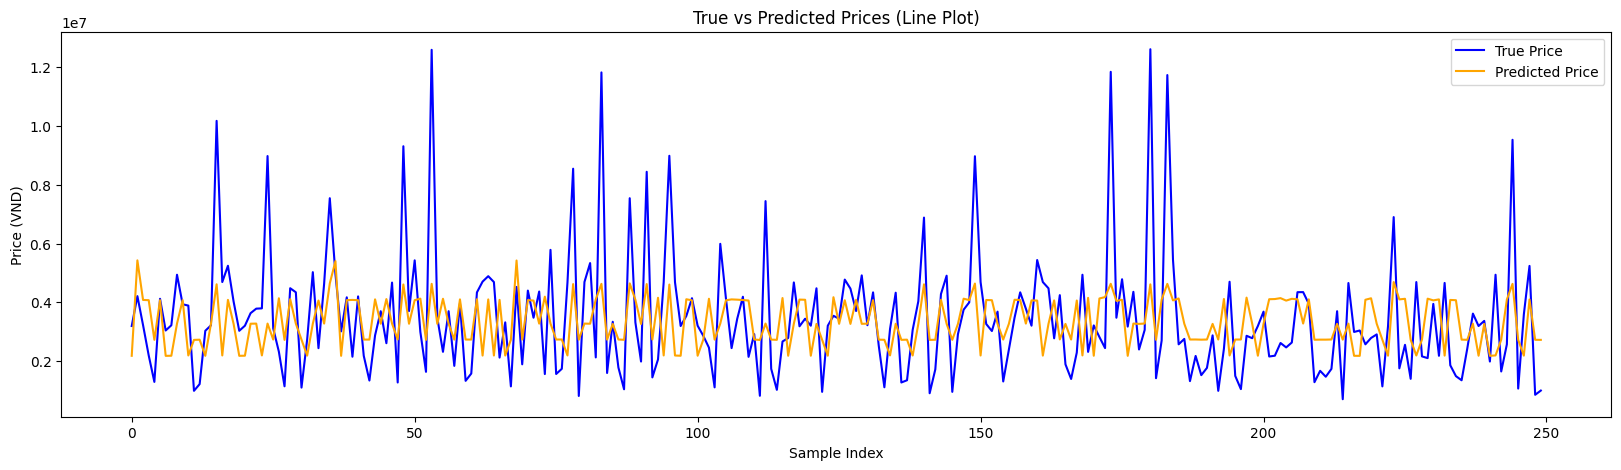

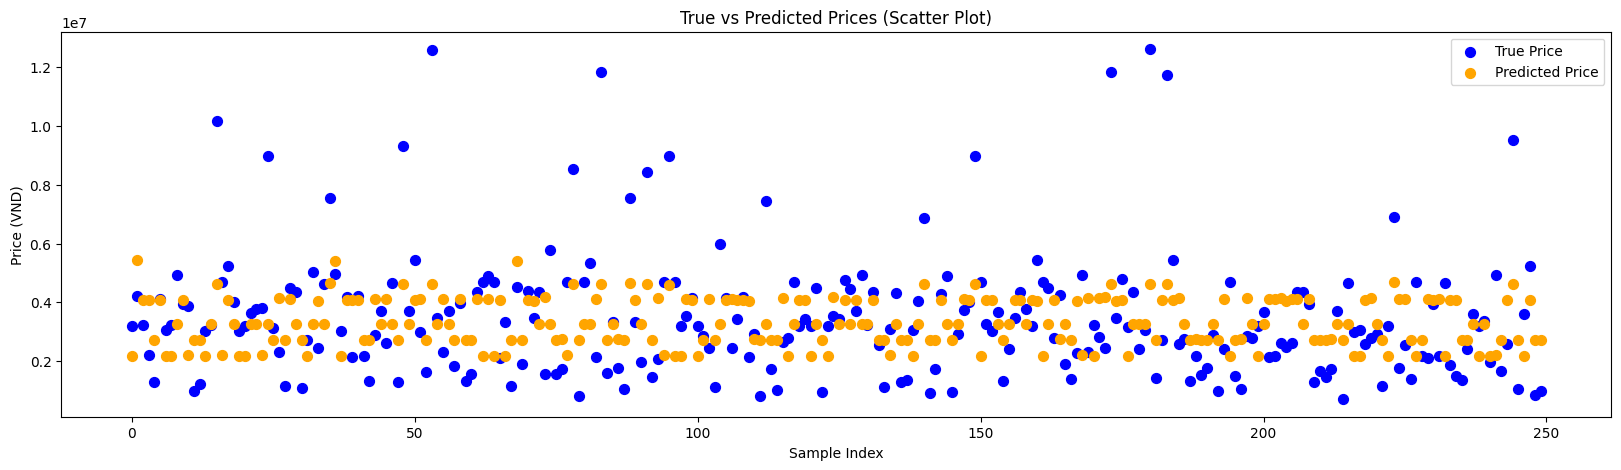

In [214]:
plot(linear_y_pred_s, y_val.flatten())

Model: LinearRegression()
╒════════════════╤══════════════════╕
│ Metrics        │           Values │
╞════════════════╪══════════════════╡
│ Training score │             0.22 │
├────────────────┼──────────────────┤
│ valing score   │             0.24 │
├────────────────┼──────────────────┤
│ MAE            │       1489278.57 │
├────────────────┼──────────────────┤
│ MSE            │ 3546322868336.50 │
├────────────────┼──────────────────┤
│ RMSE           │       1883168.31 │
╘════════════════╧══════════════════╛


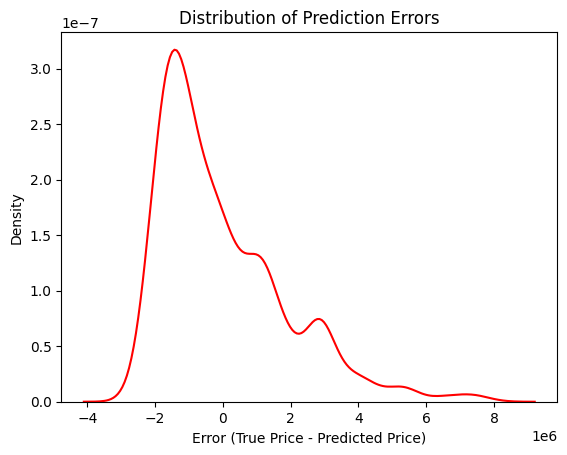

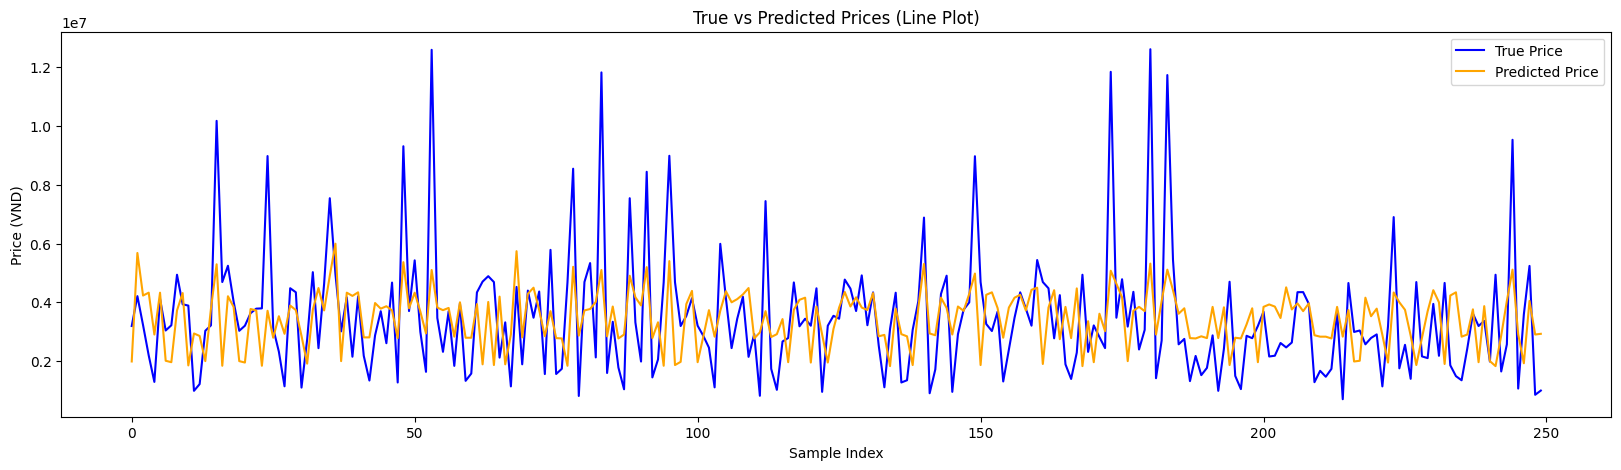

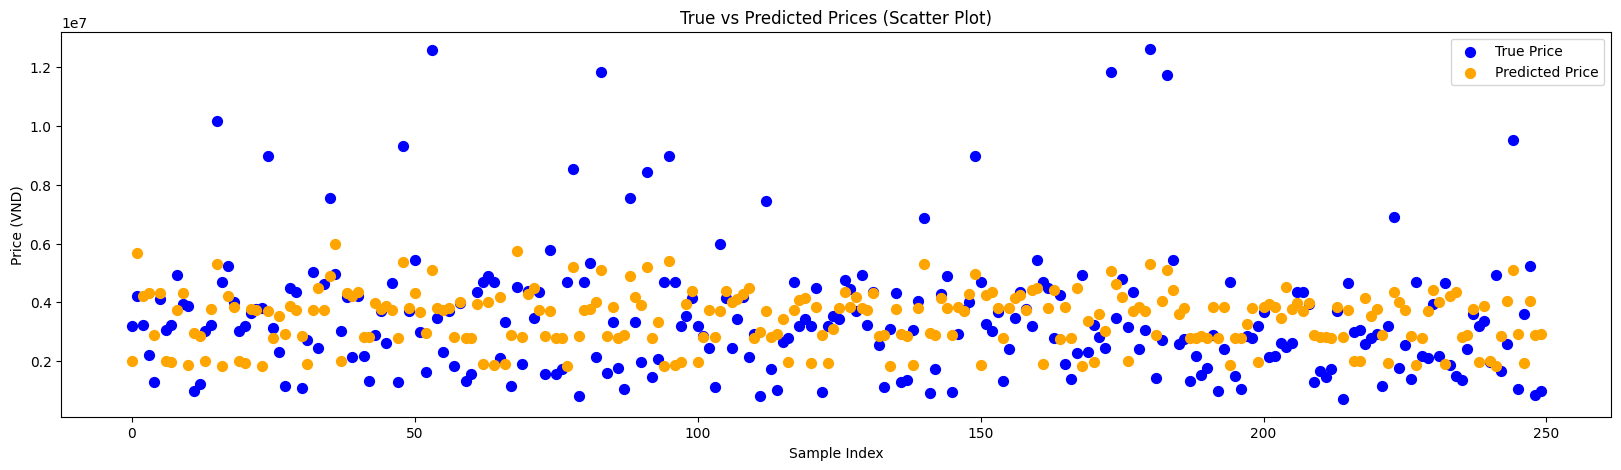

In [215]:
predictions_lr_fs, training_score_lr_fs, valing_score_lr_fs, MAE_lr_fs, MSE_lr_fs, RMSE_lr_fs = predict(lr, X_train_selected, X_val_selected)
plot(predictions_lr_fs, y_val)

In [216]:

print('Model: {}'.format(lr))
table_rf = []
table_rf.append(['', 'Without Feature Selection', 'With Feature Selection'])
table_rf.append(['Training score', training_score_lr, training_score_lr_fs])
table_rf.append(['Evaluation score', valing_score_lr, valing_score_lr_fs])
table_rf.append(['MAE', MAE_lr, MAE_lr_fs])
table_rf.append(['MSE', MSE_lr, MSE_lr_fs])
table_rf.append(['RMSE', RMSE_lr, RMSE_lr_fs])
print(tabulate(table_rf, headers='firstrow', tablefmt='fancy_grid', numalign='right', floatfmt=".2f"))

Model: LinearRegression()
╒══════════════════╤═════════════════════════════╤══════════════════════════╕
│                  │   Without Feature Selection │   With Feature Selection │
╞══════════════════╪═════════════════════════════╪══════════════════════════╡
│ Training score   │                        0.33 │                     0.22 │
├──────────────────┼─────────────────────────────┼──────────────────────────┤
│ Evaluation score │                        0.35 │                     0.24 │
├──────────────────┼─────────────────────────────┼──────────────────────────┤
│ MAE              │                  1370790.48 │               1489278.57 │
├──────────────────┼─────────────────────────────┼──────────────────────────┤
│ MSE              │            3022324667603.05 │         3546322868336.50 │
├──────────────────┼─────────────────────────────┼──────────────────────────┤
│ RMSE             │                  1738483.44 │               1883168.31 │
╘══════════════════╧══════════════════

In [217]:
from scipy.stats.mstats import winsorize
import numpy as np

# Winsorizing: Cắt đuôi dữ liệu ở mức 1% thấp nhất và cao nhất
def apply_winsorizing(data, lower_percentile=0.01, upper_percentile=0.99):
    winsorized_data = winsorize(data, limits=(lower_percentile, 1 - upper_percentile))
    return winsorized_data

# Log-transform: Chuyển đổi cột Price sang log(Price)
def apply_log_transform(data, column_name):
    data[f'log_{column_name}'] = np.log(data[column_name])
    return data

y_train_winsorized = apply_winsorizing(y_train, lower_percentile=0.01, upper_percentile=0.99)
y_val_winsorized = apply_winsorizing(y_val, lower_percentile=0.01, upper_percentile=0.99)

# Chuyển đổi dữ liệu thành log(Price)
val_data = apply_log_transform(valset, 'Price')
train_data = apply_log_transform(trainset, 'Price')

# Cập nhật y_train và y_val với log-transform
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)

# In kết quả để kiểm tra
print("Winsorized Price (first 5 values):", y_train_winsorized[:5])
print("Log-transformed Price (first 5 values):", train_data['log_Price'].head())

print("\n")
print("Winsorized Price (first 5 values):", y_val_winsorized[:5])
print("Log-transformed Price (first 5 values):", val_data['log_Price'].head())

Winsorized Price (first 5 values): [[2654000]
 [8983000]
 [1735000]
 [1859000]
 [2536000]]
Log-transformed Price (first 5 values): 0    14.791578
1    16.010844
2    14.366518
3    14.435549
4    14.746099
Name: log_Price, dtype: float64


Winsorized Price (first 5 values): [[3189800]
 [4208000]
 [3220000]
 [2188000]
 [1286000]]
Log-transformed Price (first 5 values): 0    14.975469
1    15.252498
2    14.984892
3    14.598498
4    14.067047
Name: log_Price, dtype: float64


Iteration 0: Cost = 110.66742820190431, w = [ 1.48805415e-02  1.84786424e-04 -3.43359635e-05  2.33020933e-04
 -1.27783706e-04 -7.86022283e-05 -4.85437240e-05  6.65526675e-05
 -1.37588071e-05 -4.32218208e-05 -1.44532642e-04  1.67192395e-04
 -6.75350869e-05 -2.68635082e-05  6.37199998e-06  1.40819320e-05
  4.98886054e-06  2.86409417e-05  5.05510094e-05  4.46404031e-05
 -3.33011312e-05  8.51893034e-06 -1.28799657e-05 -9.98215390e-05
  1.43712774e-05 -8.99652408e-06 -1.45435935e-05  9.54669157e-06
  3.47740235e-06 -2.11281678e-06 -4.41421948e-06 -1.55696498e-05
  3.90842645e-05  1.26057805e-05 -1.08167865e-05  3.50365198e-06
 -3.95065479e-06  1.69623190e-05  6.35710938e-06  1.04661194e-05
  3.86245234e-05 -4.30010008e-05  1.88260165e-05 -1.54674881e-05
 -8.03891426e-05  1.81348751e-05  5.59993336e-06 -8.79418079e-06
  9.96573093e-06  8.22121004e-06 -2.99841931e-06  3.91784593e-05
 -1.14111399e-05  4.69765175e-05 -4.99995479e-06]
Iteration 100: Cost = 90.6137468084131, w = [ 1.43020821e+00 

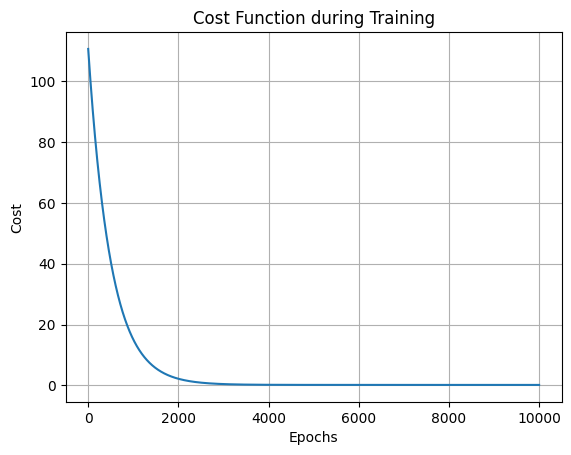

MAE: 0.4152301755071138
RMSE: 0.4972208043171679
MAPE: 0.02807997758864565
R2: 0.3025111033535445


AttributeError: 'LinearRegression' object has no attribute 'plot_yy'

In [219]:
linear_reg_r = ModelLinearRegression()
linear_reg_r.train(X_train_scaled, y_train_log)
linear_y_pred_r = linear_reg_r.predict(X_val_scaled)

# Đánh giá mô hình
linear_score_mae, linear_score_rmse, linear_score_mape, linear_r2 = linear_reg_r.evaluate(y_val_log, linear_y_pred_r)

# In kết quả
print("MAE:", linear_score_mae)
print("RMSE:", linear_score_rmse)
print("MAPE:", linear_score_mape)
print("R2:", linear_r2)

# Vẽ biểu đồ
linear_reg.plot_yy(25, 5, linear_y_pred_r, y_val_log)

## Triển khai mô hình trên Test data

In [225]:
X_test = testset.drop(["Price"] , axis=1)
y_test = testset["Price"]
selected_features = ['SClass', 'Duration', 'Total_Stops']
X_test_lr = X_test[selected_features]
y_test_lr = testset["Price"]
X_test_lr = X_test_lr.reset_index(drop=True)
y_test_lr = y_test.reset_index(drop=True)


### Default model

Test MAE: 4971322.451515378
Test RMSE: 5554914.605716868
Test MAPE: 1.6768151832573968
Test R2: -5.407504207735496


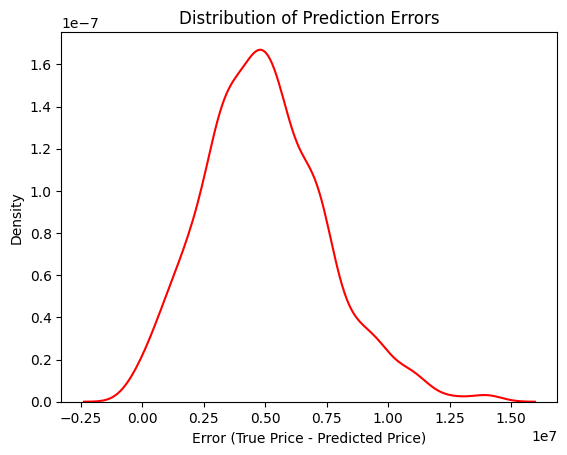

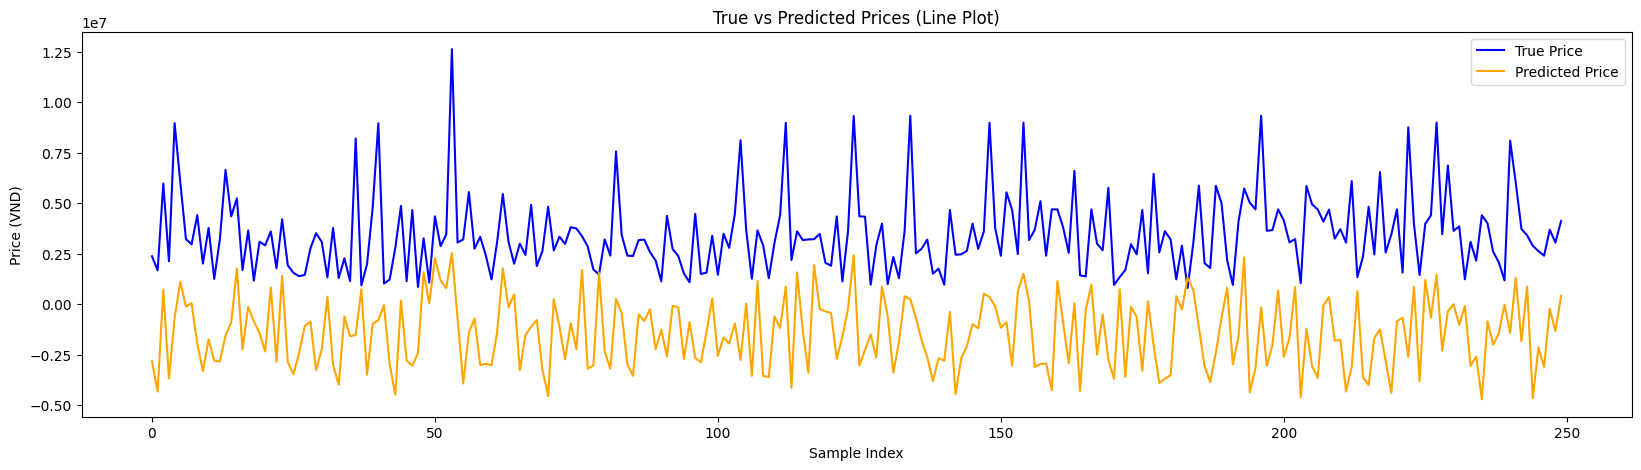

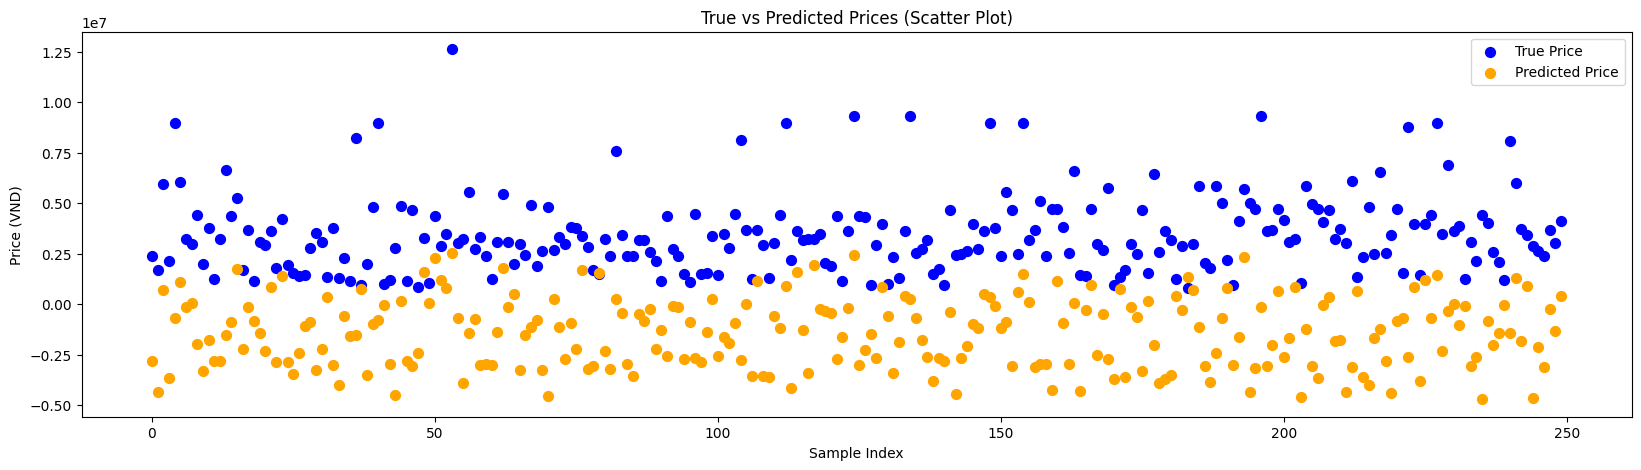

In [226]:
# Perform inference on the test data
y_test_pred = linear_reg.predict(X_test.values)

# Evaluate the model on the test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

test_mae = mean_absolute_error(y_test.values, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test.values, y_test_pred))
test_mape = mean_absolute_percentage_error(y_test.values, y_test_pred)
test_r2 = r2_score(y_test.values, y_test_pred)

# Print the evaluation metrics
print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test MAPE:", test_mape)
print("Test R2:", test_r2)

# Plot the actual vs predicted values
plot(y_test_pred.flatten(), y_test_rf.values.flatten())

Test MAE (selected features): 1471510.4065089475
Test RMSE (selected features): 1927988.8591314703
Test MAPE (selected features): 0.5789015439012425
Test R2 (selected features): 0.22813176961810822


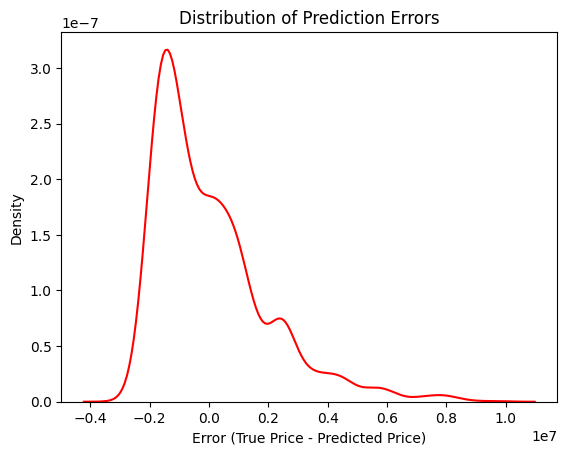

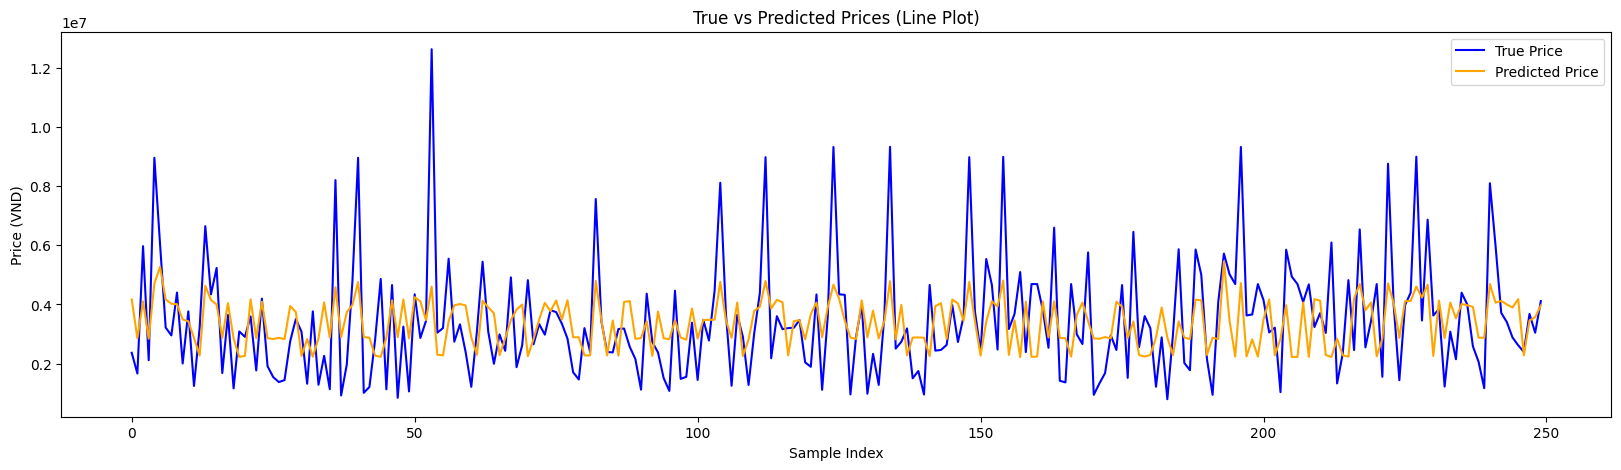

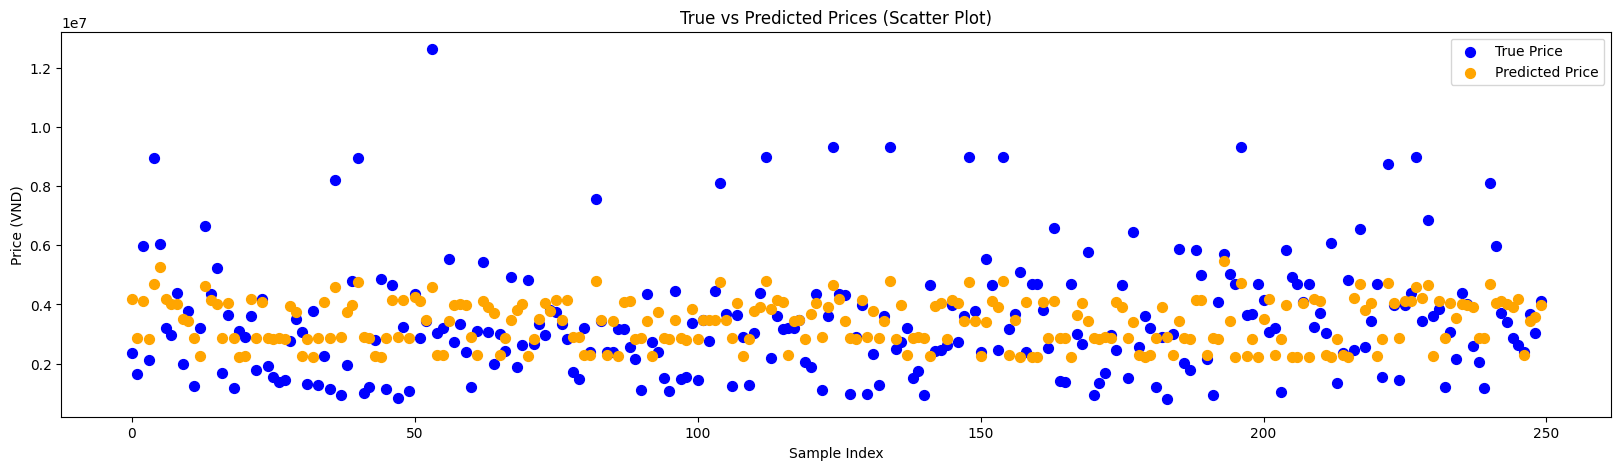

In [230]:
# Select the features for inference
X_test_selected = X_test[selected_features]

# Align the selected features with the training feature set by adding missing columns with zeros
X_test_aligned = pd.DataFrame(0, index=X_test.index, columns=X_train.columns)
X_test_aligned[selected_features] = X_test_selected

# Perform inference on the test data using the aligned features
y_test_pred_selected = linear_reg.predict(X_test_aligned.values)

# Evaluate the model on the test data with selected features
test_mae_selected = mean_absolute_error(y_test_lr.values, y_test_pred_selected)
test_rmse_selected = np.sqrt(mean_squared_error(y_test_lr.values, y_test_pred_selected))
test_mape_selected = mean_absolute_percentage_error(y_test_lr.values, y_test_pred_selected)
test_r2_selected = r2_score(y_test_lr.values, y_test_pred_selected)

# Print the evaluation metrics
print("Test MAE (selected features):", test_mae_selected)
print("Test RMSE (selected features):", test_rmse_selected)
print("Test MAPE (selected features):", test_mape_selected)
print("Test R2 (selected features):", test_r2_selected)

# Plot the actual vs predicted values
plot(y_test_pred_selected.flatten(), y_test_lr.values.flatten())

In [231]:
y_test_winsorized = apply_winsorizing(y_test, lower_percentile=0.01, upper_percentile=0.99)

# Chuyển đổi dữ liệu thành log(Price)
test_data = apply_log_transform(testset, 'Price')

# Cập nhật y_train và y_val với log-transform
y_test_log = np.log(y_test)

# In kết quả để kiểm tra
print("Winsorized Price (first 5 values):", y_test_winsorized[:5])
print("Log-transformed Price (first 5 values):", test_data['log_Price'].head())



Winsorized Price (first 5 values): [2366000 1666900 5967000 2117000 8953000]
Log-transformed Price (first 5 values): 0    14.676711
1    14.326476
2    15.601755
3    14.565511
4    16.007499
Name: log_Price, dtype: float64


In [232]:
def plot(predictions, y_true):
    sns.distplot(y_true - predictions, kde=True, hist=False, color='red')
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error (True Price - Predicted Price)")
    plt.ylabel("Density")
    plt.show()
    
    fig1, ax = plt.subplots(1, 1, figsize=(20, 5))

    ax.plot([i for i in range(250)], y_true[:250], color='blue', label='True Price')
    ax.plot([i for i in range(250)], predictions[:250], color='orange', label='Predicted Price')

    ax.set_ylabel("Price (VND)")
    ax.set_xlabel("Sample Index")
    ax.legend()
    plt.title("True vs Predicted Prices (Line Plot)")
    plt.show()
    
    fig2, ax = plt.subplots(1, 1, figsize=(20, 5))

    ax.scatter([i for i in range(250)], y_true[:250], color='blue', label='True Price', s=50)
    ax.scatter([i for i in range(250)], predictions[:250], color='orange', label='Predicted Price', s=50)
    
    ax.set_ylabel("Price (VND)")
    ax.set_xlabel("Sample Index")
    ax.legend()
    plt.title("True vs Predicted Prices (Scatter Plot)")
    plt.show()

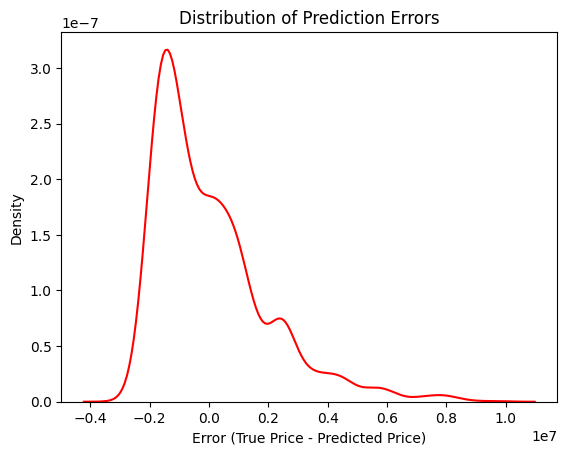

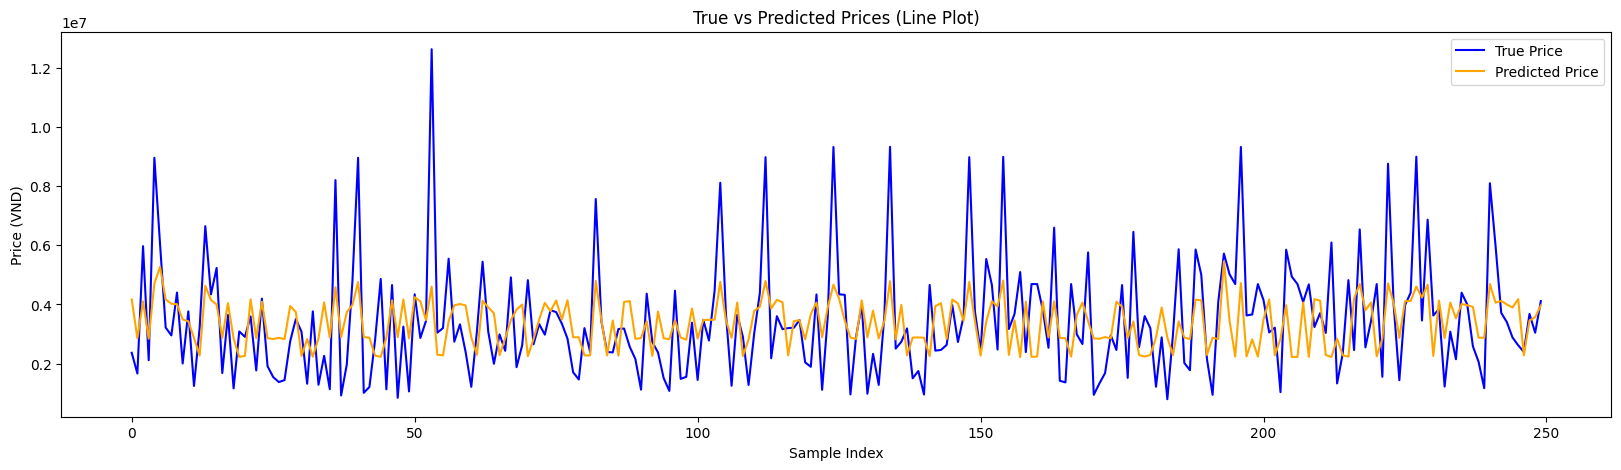

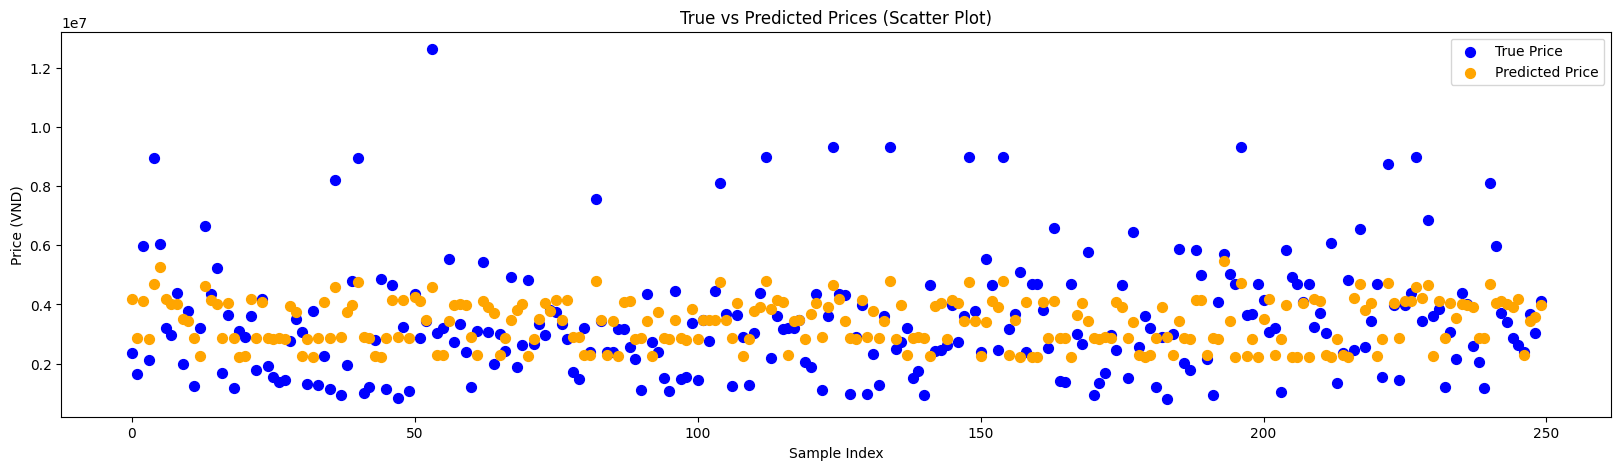

In [233]:
plot(y_test_pred_selected.flatten(), y_test_rf.values.flatten())

In [234]:
def plot_test_log(predictions):
    sns.distplot(y_test_log - predictions, kde=True, hist=False, color='red')
    plt.title("Distribution of Prediction Errors")
    plt.xlabel("Error (True Price - Predicted Price)")
    plt.ylabel("Density")
    plt.show()
    
    fig1, ax = plt.subplots(1, 1, figsize=(20, 5))

    ax.plot([i for i in range(250)], y_test_log[:250], color='blue', label='True Price')
    ax.plot([i for i in range(250)], predictions[:250], color='orange', label='Predicted Price')

    ax.set_ylabel("Price (VND)")
    ax.set_xlabel("Sample Index")
    ax.legend()
    plt.title("True vs Predicted Prices (Line Plot)")
    plt.show()
    
    fig2, ax = plt.subplots(1, 1, figsize=(20, 5))

    ax.scatter([i for i in range(250)], y_test_log[:250], color='blue', label='True Price', s=50)
    ax.scatter([i for i in range(250)], predictions[:250], color='orange', label='Predicted Price', s=50)
    
    ax.set_ylabel("Price (VND)")
    ax.set_xlabel("Sample Index")
    ax.legend()
    plt.title("True vs Predicted Prices (Scatter Plot)")
    plt.show()

Test MAE (log-transformed): 0.9297530012060016
Test RMSE (log-transformed): 1.0784556969702315
Test MAPE (log-transformed): 0.06146785050939945
Test R2 (log-transformed): -2.2290162981766515


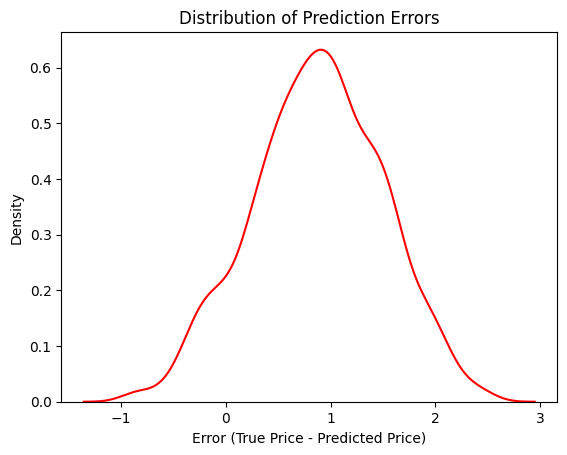

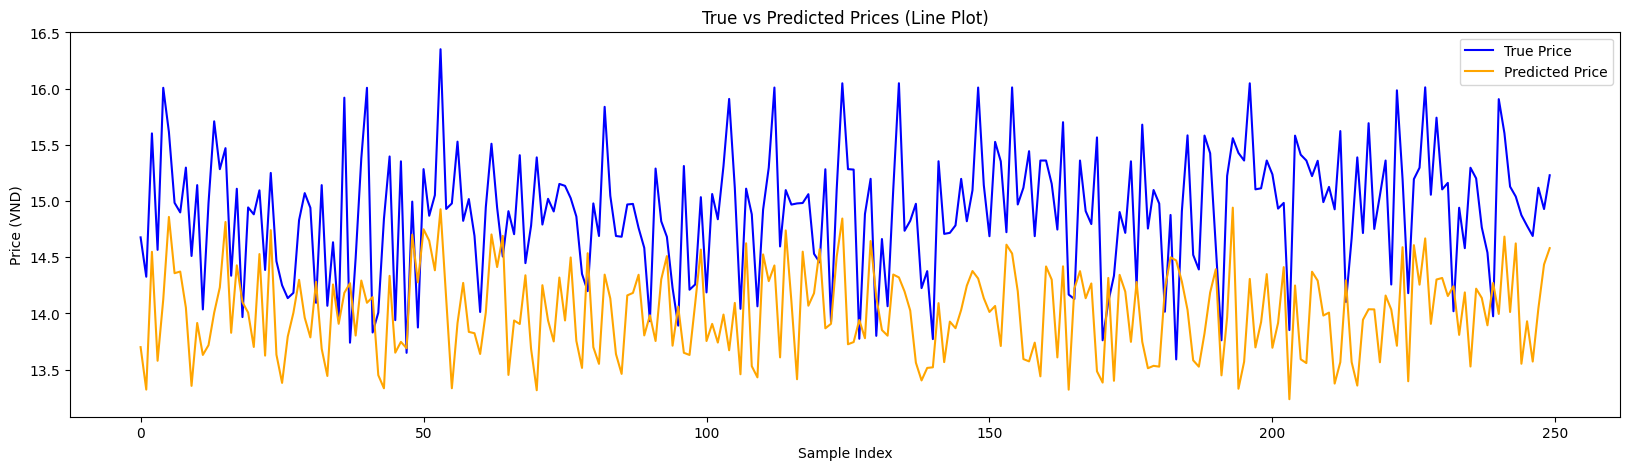

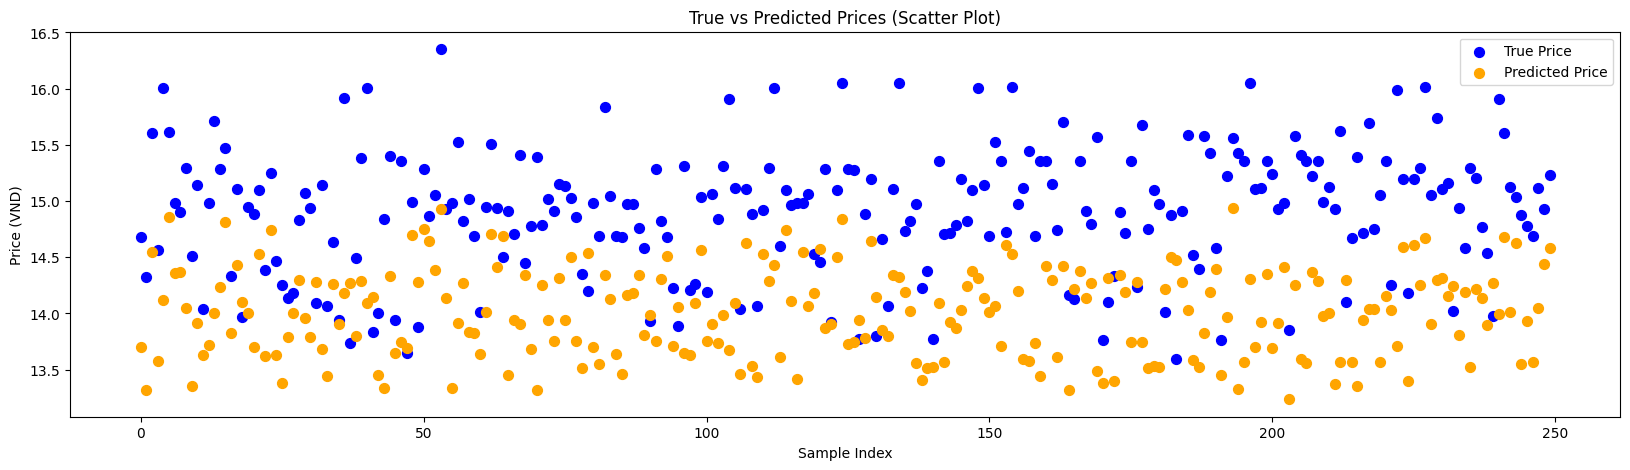

In [239]:
y_test_log = np.log(y_test)
y_test_pred_log = linear_reg_r.predict(X_test)
# Evaluate the model on the test data with log-transformed target variable  
test_mae_log, test_rmse_log, test_mape_log, test_r2_log = linear_reg_r.evaluate(y_test_log, y_test_pred_log)
# Print the evaluation metrics
print("Test MAE (log-transformed):", test_mae_log)
print("Test RMSE (log-transformed):", test_rmse_log)    
print("Test MAPE (log-transformed):", test_mape_log)
print("Test R2 (log-transformed):", test_r2_log)
# Vẽ biểu đồ
plot(y_test_pred_log.flatten(), y_test_log)

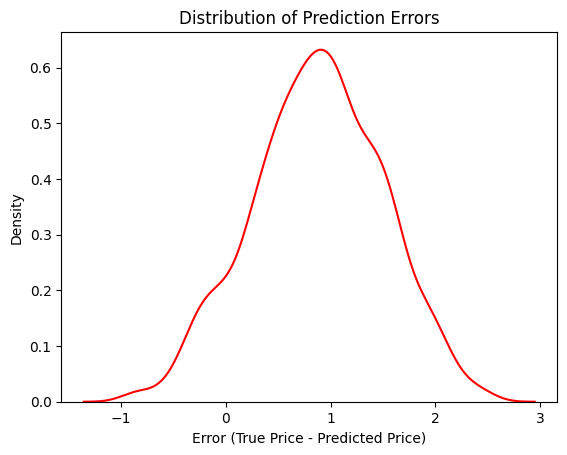

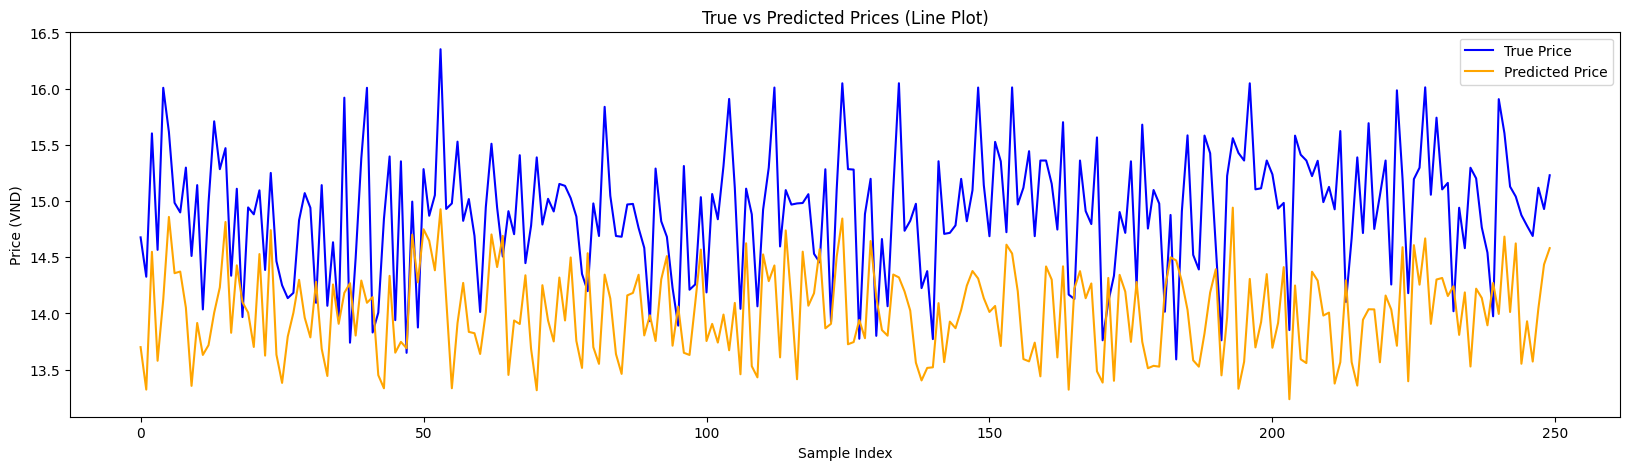

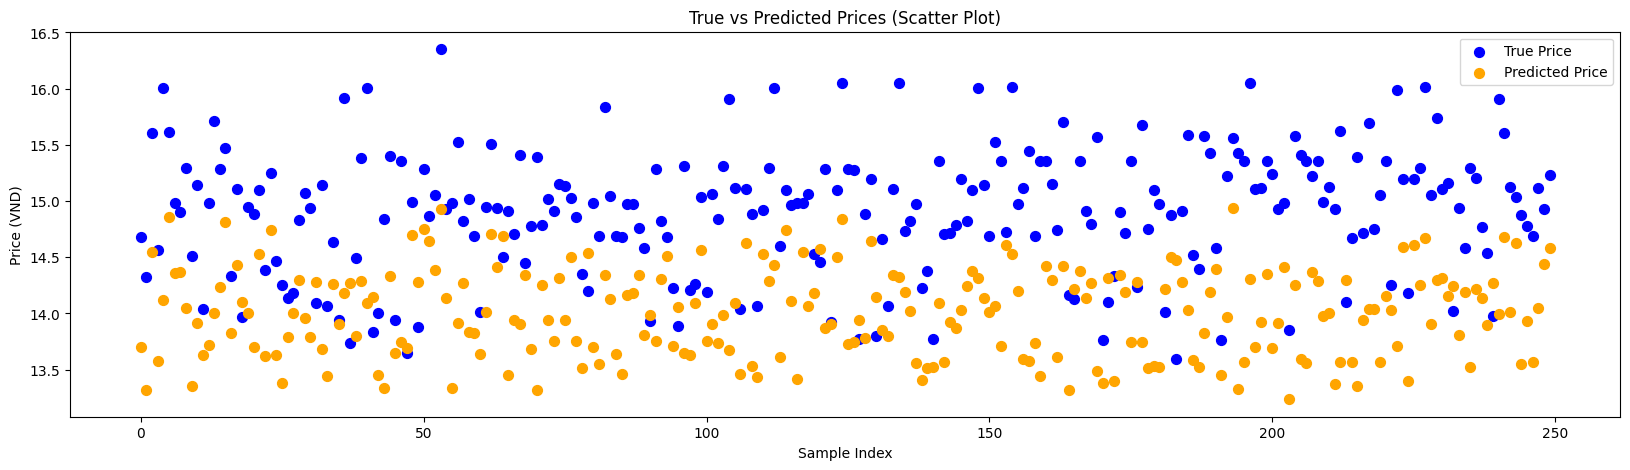

In [240]:
plot_test_log(y_test_pred_log.flatten())